In [36]:
'''
Some exploration of the dataset, csvs were created from the directly downloaded json files 
by using the json to csv converter script 
'''
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.feature_extraction import stop_words

In [2]:
user_df = pd.read_csv("user.csv")

In [3]:
user_df.head()

,compliment_photos,cool,compliment_more,funny,name,compliment_note,compliment_list,user_id,compliment_cute,yelping_since,...,useful,review_count,fans,average_stars,compliment_writer,compliment_plain,friends,elite,compliment_funny,compliment_cool
0,0,0,0,0,Johnny,0,0,oMy_rEb0UBEmMlu-zcxnoQ,0,2014-11-03,...,0,8,0,4.67,0,1,"['cvVMmlU1ouS3I5fhutaryQ', 'nj6UZ8tdGo8YJ9lUMT...",[],0,0
1,0,0,0,0,Chris,0,0,JJ-aSuM4pCFPdkfoZ34q0Q,0,2013-09-24,...,0,10,0,3.70,0,0,"['0njfJmB-7n84DlIgUByCNw', 'rFn3Xe3RqHxRSxWOU1...",[],0,0
2,0,0,0,0,Tiffy,0,0,uUzsFQn_6cXDh6rPNGbIFA,0,2017-03-02,...,0,1,0,2.00,0,0,[],[],0,0
3,0,0,0,0,Mark,0,0,mBneaEEH5EMyxaVyqS-72A,0,2015-03-13,...,0,6,0,4.67,0,0,[],[],0,0
4,0,0,0,0,Evelyn,0,0,W5mJGs-dcDWRGEhAzUYtoA,0,2016-09-08,...,0,3,0,4.67,0,0,[],[],0,0


In [4]:
biz_df = pd.read_csv("business.csv")

In [5]:
biz_df.head()

,attributes.Ambience.trendy,attributes.DietaryRestrictions.halal,categories,attributes.WheelchairAccessible,neighborhood,attributes.RestaurantsPriceRange2,attributes.DietaryRestrictions.vegetarian,attributes.BYOBCorkage,attributes.GoodForMeal.lunch,attributes.Ambience.casual,...,attributes.BikeParking,is_open,attributes.DriveThru,attributes.BestNights.saturday,attributes.WiFi,attributes.Corkage,attributes.ByAppointmentOnly,city,longitude,attributes.DietaryRestrictions.gluten-free
0,NaN,NaN,"['Dentists', 'General Dentistry', 'Health & Me...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,True,Ahwatukee,-111.978599,NaN
1,NaN,NaN,"['Hair Stylists', 'Hair Salons', ""Men's Hair S...",True,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,False,McMurray,-80.104900,NaN
2,NaN,NaN,"['Departments of Motor Vehicles', 'Public Serv...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,Phoenix,-112.115310,NaN
3,NaN,NaN,"['Sporting Goods', 'Shopping']",NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,True,0,NaN,NaN,NaN,NaN,NaN,Tempe,-111.964725,NaN
4,False,NaN,"['American (New)', 'Nightlife', 'Bars', 'Sandw...",NaN,NaN,2.0,NaN,NaN,False,True,...,True,1,False,True,free,NaN,NaN,Cuyahoga Falls,-81.475690,NaN


In [6]:
tip_df = pd.read_csv("tip.csv")

In [7]:
tip_df.head()

,text,business_id,date,user_id,likes
0,Get here early enough to have dinner.,tJRDll5yqpZwehenzE2cSg,2012-07-15,zcTZk7OG8ovAmh_fenH21g,0
1,Great breakfast large portions and friendly wa...,jH19V2I9fIslnNhDzPmdkA,2015-08-12,ZcLKXikTHYOnYt5VYRO5sg,0
2,Nice place. Great staff. A fixture in the tow...,dAa0hB2yrnHzVmsCkN4YvQ,2014-06-20,oaYhjqBbh18ZhU0bpyzSuw,0
3,Happy hour 5-7 Monday - Friday,dAa0hB2yrnHzVmsCkN4YvQ,2016-10-12,ulQ8Nyj7jCUR8M83SUMoRQ,0
4,"Parking is a premium, keep circling, you will ...",ESzO3Av0b1_TzKOiqzbQYQ,2017-01-28,ulQ8Nyj7jCUR8M83SUMoRQ,0


In [8]:
review_df = pd.read_csv("review.csv")

In [9]:
len(review_df)

5261669

In [10]:
review_user_merged = (review_df.merge(user_df, on = 'user_id'))

In [11]:
review_user_merged

,review_id,user_id,cool_x,business_id,useful_x,funny_x,text,stars,date,compliment_photos,...,useful_y,review_count,fans,average_stars,compliment_writer,compliment_plain,friends,elite,compliment_funny,compliment_cool
0,v0i_UHJMo_hPBq9bxWvW4w,bv2nCi5Qv5vroFiqKGopiw,0,0W4lkclzZThpx3V65bVgig,0,0,"Love the staff, love the meat, love the place....",5,2016-05-28,0,...,0,6,0,4.67,0,0,['4Zpn3ObC2zexkIhor4LJIQ'],[],0,0
1,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,0,AEx2SYEUJmTxVVB18LlCwA,0,0,Super simple place but amazing nonetheless. It...,5,2016-05-28,0,...,0,6,0,4.67,0,0,['4Zpn3ObC2zexkIhor4LJIQ'],[],0,0
2,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,0,VR6GpWIda3SfvPC-lg9H3w,0,0,Small unassuming place that changes their menu...,5,2016-05-28,0,...,0,6,0,4.67,0,0,['4Zpn3ObC2zexkIhor4LJIQ'],[],0,0
3,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,0,CKC0-MOWMqoeWf6s-szl8g,0,0,Lester's is located in a beautiful neighborhoo...,5,2016-05-28,0,...,0,6,0,4.67,0,0,['4Zpn3ObC2zexkIhor4LJIQ'],[],0,0
4,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,0,ACFtxLv8pGrrxMm6EgjreA,0,0,Love coming here. Yes the place always needs t...,4,2016-05-28,0,...,0,6,0,4.67,0,0,['4Zpn3ObC2zexkIhor4LJIQ'],[],0,0
5,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,0,s2I_Ni76bjJNK9yG60iD-Q,0,0,Had their chocolate almond croissant and it wa...,4,2016-05-28,0,...,0,6,0,4.67,0,0,['4Zpn3ObC2zexkIhor4LJIQ'],[],0,0
6,HRPm3vEZ_F-33TYVT7Pebw,_4iMDXbXZ1p1ONG297YEAQ,0,8QWPlVQ6D-OExqXoaD2Z1g,1,0,Cycle Pub Las Vegas was a blast! Got a groupon...,5,2014-09-24,0,...,0,1,0,5.00,0,0,[],[],0,0
7,ymAUG8DZfQcFTBSOiaNN4w,u0LXt3Uea_GidxRW1xcsfg,2,9_CGhHMz8698M9-PkVf0CQ,0,0,Who would have guess that you would be able to...,4,2012-05-11,3,...,79,359,8,3.62,3,8,"['QSpRpbemKx5U4-NtUumUbw', 'G-6X-llgA_qAxGxocy...","[2012, 2014, 2016, 2017, 2015, 2013]",4,4
8,8UIishPUD92hXtScSga_gw,u0LXt3Uea_GidxRW1xcsfg,0,gkCorLgPyQLsptTHalL61g,1,0,Always drove past this coffee house and wonder...,4,2015-10-27,3,...,79,359,8,3.62,3,8,"['QSpRpbemKx5U4-NtUumUbw', 'G-6X-llgA_qAxGxocy...","[2012, 2014, 2016, 2017, 2015, 2013]",4,4
9,w41ZS9shepfO3uEyhXEWuQ,u0LXt3Uea_GidxRW1xcsfg,0,5r6-G9C4YLbC7Ziz57l3rQ,1,0,"Not bad!! Love that there is a gluten-free, ve...",3,2013-02-09,3,...,79,359,8,3.62,3,8,"['QSpRpbemKx5U4-NtUumUbw', 'G-6X-llgA_qAxGxocy...","[2012, 2014, 2016, 2017, 2015, 2013]",4,4


In [12]:
review_user_merged['user_id'].value_counts()

CxDOIDnH8gp9KXzpBHJYXw    3569
bLbSNkLggFnqwNNzzq-Ijw    2077
PKEzKWv_FktMm2mGPjwd0Q    1611
DK57YibC5ShBmqQl97CKog    1463
QJI9OSEn6ujRCtrX06vs1w    1322
d_TBs6J3twMy9GChqUEXkg    1184
ELcQDlf69kb-ihJfxZyL0A    1159
cMEtAiW60I5wE_vLfTxoJQ    1126
hWDybu_KvYLSdEFzGrniTw    1117
U4INQZOPSUaj8hMjLlZ3KA    1101
UYcmGbelzRa0Q6JqzLoguw    1092
62GNFh5FySkA3MbrQmnqvg    1051
dIIKEfOgo0KqUfGQvGikPg     989
n86B7IkbU20AkxlFX_5aew     955
iDlkZO2iILS8Jwfdy7DP9A     947
N3oNEwh0qgPqPP3Em6wJXw     926
rCWrxuRC8_pfagpchtHp6A     915
Ry1O_KXZHGRI8g5zBR3IcQ     896
0BBUmH7Krcax1RZgbH4fSA     874
pMefTWo6gMdx8WhYSA2u3w     838
3nDUQBjKyVor5wV0reJChg     833
WeVkkF5L39888IPPlRhNpg     830
YMgZqBUAddmFErxLtCfK_w     823
U5YQX_vMl_xQy8EQDqlNQQ     810
Q9mA60HnY87C1TW5kjAZ6Q     803
dt9IHwfuZs9D9LOH7gjNew     798
fiGqQ7pIGKyZ9G0RqWLMpg     787
PeLGa5vUR8_mcsn-fn42Jg     775
Wc5L6iuvSNF5WGBlqIO8nw     772
Xxvz5g67eaCr3emnkY5M6w     772
                          ... 
fminnIzTMiZAlWpkp_vpYA       1
Ds--waLL

In [13]:
top_reviewer_df = review_user_merged.loc[review_user_merged['user_id'] == 'CxDOIDnH8gp9KXzpBHJYXw']

In [28]:
top_reviewer_df

,review_id,user_id,cool_x,business_id,useful_x,funny_x,text,stars,date,compliment_photos,...,review_count,fans,average_stars,compliment_writer,compliment_plain,friends,elite,compliment_funny,compliment_cool,year
1686269,YOcVrp_R105ifoEpjIO6-g,CxDOIDnH8gp9KXzpBHJYXw,2,z5V7wTtLB2QYCUWlB4rNLQ,2,0,Nak Won Restaurant just opened up its third lo...,3,2010-08-23,1138,...,5868,610,3.29,422,3393,"['_5HFgadpCIaSVINVvse2Kw', 'v4dBtkYuBNM9Oo2DwA...","[2016, 2011, 2012, 2009, 2017, 2015, 2010, 201...",1434,1434,2010
1686270,CMBSAF6gck3sXenyeE8Eew,CxDOIDnH8gp9KXzpBHJYXw,1,POJL-N7Smw1UZMP_xldFwg,1,0,I did not expect Levetto be so crazily busy on...,3,2016-06-17,1138,...,5868,610,3.29,422,3393,"['_5HFgadpCIaSVINVvse2Kw', 'v4dBtkYuBNM9Oo2DwA...","[2016, 2011, 2012, 2009, 2017, 2015, 2010, 201...",1434,1434,2016
1686271,99-quTEety_Jxktyl5TkZA,CxDOIDnH8gp9KXzpBHJYXw,1,5nqh0BJ3IrvDYpmkBheD4g,1,0,T.A.N. is the first stop of our Niagara Neigh...,3,2010-11-16,1138,...,5868,610,3.29,422,3393,"['_5HFgadpCIaSVINVvse2Kw', 'v4dBtkYuBNM9Oo2DwA...","[2016, 2011, 2012, 2009, 2017, 2015, 2010, 201...",1434,1434,2010
1686272,67RY6FKzIhwRBOOzBbJSGQ,CxDOIDnH8gp9KXzpBHJYXw,0,9v9cMGBpUm_IzTuPfXXEOw,0,0,Firefly Seafood and Steakhouse is another Chin...,1,2009-11-28,1138,...,5868,610,3.29,422,3393,"['_5HFgadpCIaSVINVvse2Kw', 'v4dBtkYuBNM9Oo2DwA...","[2016, 2011, 2012, 2009, 2017, 2015, 2010, 201...",1434,1434,2009
1686273,5EZOEJgkvncCmbq-veQBug,CxDOIDnH8gp9KXzpBHJYXw,3,ZCYCNWA98718SZ0A4bHD7A,6,1,2.5 for the Bingsu + 0.5 for the Setup\r\n\r\n...,3,2017-11-16,1138,...,5868,610,3.29,422,3393,"['_5HFgadpCIaSVINVvse2Kw', 'v4dBtkYuBNM9Oo2DwA...","[2016, 2011, 2012, 2009, 2017, 2015, 2010, 201...",1434,1434,2017
1686274,4XdJ0SB7mILhENyzDDgxjA,CxDOIDnH8gp9KXzpBHJYXw,3,GaRMjCHk85mEPamspGdNhw,4,1,Accurate Time is a little little shop inside M...,4,2010-12-26,1138,...,5868,610,3.29,422,3393,"['_5HFgadpCIaSVINVvse2Kw', 'v4dBtkYuBNM9Oo2DwA...","[2016, 2011, 2012, 2009, 2017, 2015, 2010, 201...",1434,1434,2010
1686275,r7bwjZsjINHn4OS4ymAcXA,CxDOIDnH8gp9KXzpBHJYXw,2,QbezpPQVADzR58m5Ngy2NQ,3,1,Huge Patio+Live Music+Friendly Wait Staffs+ De...,4,2011-08-15,1138,...,5868,610,3.29,422,3393,"['_5HFgadpCIaSVINVvse2Kw', 'v4dBtkYuBNM9Oo2DwA...","[2016, 2011, 2012, 2009, 2017, 2015, 2010, 201...",1434,1434,2011
1686276,8-MrsqUdlIjvJaswzn50dg,CxDOIDnH8gp9KXzpBHJYXw,1,efOtTiIqTvLijm3kIYgqPQ,2,3,I love Noodles!! \r\n\r\nA bite of the Homemad...,4,2012-07-31,1138,...,5868,610,3.29,422,3393,"['_5HFgadpCIaSVINVvse2Kw', 'v4dBtkYuBNM9Oo2DwA...","[2016, 2011, 2012, 2009, 2017, 2015, 2010, 201...",1434,1434,2012
1686277,nHu1o93DMnMpZ9iOQxn0HQ,CxDOIDnH8gp9KXzpBHJYXw,2,P39yhVb1mR3akLeuSmH97g,6,0,Yummy Korean Fried Chicken! I wish the whole o...,4,2016-10-07,1138,...,5868,610,3.29,422,3393,"['_5HFgadpCIaSVINVvse2Kw', 'v4dBtkYuBNM9Oo2DwA...","[2016, 2011, 2012, 2009, 2017, 2015, 2010, 201...",1434,1434,2016
1686278,NPplqTxNeBP-IfWNgqwMnw,CxDOIDnH8gp9KXzpBHJYXw,3,kNZJMnTNXj42EfUGX3eRcw,4,3,I ended up ordering Chicken at Chico's Rotisse...,3,2013-08-06,1138,...,5868,610,3.29,422,3393,"['_5HFgadpCIaSVINVvse2Kw', 'v4dBtkYuBNM9Oo2DwA...","[2016, 2011, 2012, 2009, 2017, 2015, 2010, 201...",1434,1434,2013


In [15]:
for i in range(1686269,1689838):
    top_reviewer_df.loc[i,  'year'] = top_reviewer_df.loc[i, "date"][0:4]

C:\Users\leoso\Anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\leoso\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [16]:
# jennifer's reviews
top_reviewer_df["year"].value_counts()

2011    965
2012    664
2010    493
2013    442
2014    321
2015    219
2016    211
2017    174
2009     80
Name: year, dtype: int64

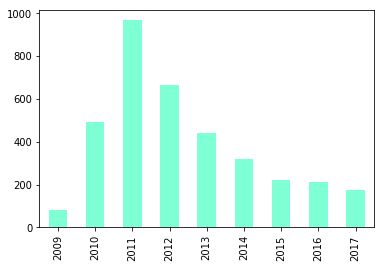

In [17]:
fig, ax = plt.subplots()
top_reviewer_df['year'].value_counts().sort_index().plot(ax=ax, kind='bar', color = "aquamarine")

In [18]:
count = 0
for i in range(len(biz_df)):
    if 'Food' in biz_df["categories"][i]:
        count +=1
    elif 'Restaurants' in biz_df["categories"][i]:
        count +=1
    elif 'Coffee & Tea' in biz_df["categories"][i]:
        count +=1
    elif 'Bars' in biz_df["categories"][i]:
        count +=1
    elif 'Pizza' in biz_df["categories"][i]:
        count +=1
    elif 'Bakeries' in biz_df["categories"][i]:
        count +=1

In [19]:
count

72103

In [20]:
category_set = set()
for i in range(len(biz_df)):
    ilist = biz_df["categories"][i][1:-1].split(",")
    for j in ilist:
        category_set.add(j.strip())

In [21]:
category_set

{'',
 "'Auction Houses'",
 "'Threading Services'",
 "'Grilling Equipment'",
 "'Wine Tasting Room'",
 "'Crane Services'",
 "'Live/Raw Food'",
 "'Mortgage Brokers'",
 "'Hostels'",
 "'Coffeeshops'",
 "'Life Insurance'",
 "'International'",
 "'Sports Clubs'",
 "'Real Estate Law'",
 "'Blood & Plasma Donation Centers'",
 "'Soul Food'",
 "'Milkshake Bars'",
 "'Eatertainment'",
 "'Beer Hall'",
 "'Flyboarding'",
 "'Seafood Markets'",
 "'Banks & Credit Unions'",
 "'Hair Loss Centers'",
 "'Opera & Ballet'",
 "'Cardio Classes'",
 "'Gay Bars'",
 "'Pubs'",
 "'Nicaraguan'",
 "'Cigar Bars'",
 "'Fences & Gates'",
 "'Party Characters'",
 "'Sports Psychologists'",
 "'Homeless Shelters'",
 "'LAN Centers'",
 "'Salvadoran'",
 "'Solar Panel Cleaning'",
 "'Teacher Supplies'",
 "'Ukrainian'",
 "'Auto Parts & Supplies'",
 "'Laser Tag'",
 "'Bike Shop'",
 "'Tours'",
 "'Planetarium'",
 "'Mountain Biking'",
 "'Thai'",
 "'Fishmonger'",
 "'Traffic Schools'",
 "'Wills'",
 "'Sicilian'",
 "'Pathologists'",
 "'Private Tu

In [22]:
print(top_reviewer_df['text'][1686269])

Nak Won Restaurant just opened up its third location replacing the Tofu Village at New Kennedy Centre. 

I am glad that Nak Won is openning up another location up North aside from the one at First Markham Place. However, I do like Tofu Village better.

When Nak Won moved into this location, not much renovation is needed. All they did is took out all those huge photos of Korean dishes on the wall..and references to Tofu Village.

The menu is similar to the other Nak Won location. With lunch specials starting at $5.99 including all the banchans! What a steal!

Since I have craving for cold noodles so I decided on the Korean Cold Noodle Soup ($8.99) instead. They do offer the one with no soup but mixed with sweet and spicy sauce.

The banchans at Nak Won is always good and plentiful. The cold noodles arrived shortly. The size is a bigger than other Korean restaurant I been to, garnished with marinated cucumber, apples slice, beef and ice cube. I feel like I am eating a bowl of bottomless 

In [23]:
review_df['user_id'].value_counts()

CxDOIDnH8gp9KXzpBHJYXw    3569
bLbSNkLggFnqwNNzzq-Ijw    2077
PKEzKWv_FktMm2mGPjwd0Q    1611
DK57YibC5ShBmqQl97CKog    1463
QJI9OSEn6ujRCtrX06vs1w    1322
d_TBs6J3twMy9GChqUEXkg    1184
ELcQDlf69kb-ihJfxZyL0A    1159
cMEtAiW60I5wE_vLfTxoJQ    1126
hWDybu_KvYLSdEFzGrniTw    1117
U4INQZOPSUaj8hMjLlZ3KA    1101
UYcmGbelzRa0Q6JqzLoguw    1092
62GNFh5FySkA3MbrQmnqvg    1051
dIIKEfOgo0KqUfGQvGikPg     989
n86B7IkbU20AkxlFX_5aew     955
iDlkZO2iILS8Jwfdy7DP9A     947
N3oNEwh0qgPqPP3Em6wJXw     926
rCWrxuRC8_pfagpchtHp6A     915
Ry1O_KXZHGRI8g5zBR3IcQ     896
0BBUmH7Krcax1RZgbH4fSA     874
pMefTWo6gMdx8WhYSA2u3w     838
3nDUQBjKyVor5wV0reJChg     833
WeVkkF5L39888IPPlRhNpg     830
YMgZqBUAddmFErxLtCfK_w     823
U5YQX_vMl_xQy8EQDqlNQQ     810
Q9mA60HnY87C1TW5kjAZ6Q     803
dt9IHwfuZs9D9LOH7gjNew     798
fiGqQ7pIGKyZ9G0RqWLMpg     787
PeLGa5vUR8_mcsn-fn42Jg     775
Wc5L6iuvSNF5WGBlqIO8nw     772
Xxvz5g67eaCr3emnkY5M6w     772
                          ... 
fminnIzTMiZAlWpkp_vpYA       1
Ds--waLL

In [24]:
long_form = ""
for i in top_reviewer_df["text"]:
    long_form += i

In [25]:
long_form = long_form.split()

In [26]:
long_form

['Nak',
 'Won',
 'Restaurant',
 'just',
 'opened',
 'up',
 'its',
 'third',
 'location',
 'replacing',
 'the',
 'Tofu',
 'Village',
 'at',
 'New',
 'Kennedy',
 'Centre.',
 'I',
 'am',
 'glad',
 'that',
 'Nak',
 'Won',
 'is',
 'openning',
 'up',
 'another',
 'location',
 'up',
 'North',
 'aside',
 'from',
 'the',
 'one',
 'at',
 'First',
 'Markham',
 'Place.',
 'However,',
 'I',
 'do',
 'like',
 'Tofu',
 'Village',
 'better.',
 'When',
 'Nak',
 'Won',
 'moved',
 'into',
 'this',
 'location,',
 'not',
 'much',
 'renovation',
 'is',
 'needed.',
 'All',
 'they',
 'did',
 'is',
 'took',
 'out',
 'all',
 'those',
 'huge',
 'photos',
 'of',
 'Korean',
 'dishes',
 'on',
 'the',
 'wall..and',
 'references',
 'to',
 'Tofu',
 'Village.',
 'The',
 'menu',
 'is',
 'similar',
 'to',
 'the',
 'other',
 'Nak',
 'Won',
 'location.',
 'With',
 'lunch',
 'specials',
 'starting',
 'at',
 '$5.99',
 'including',
 'all',
 'the',
 'banchans!',
 'What',
 'a',
 'steal!',
 'Since',
 'I',
 'have',
 'craving',
 'f

In [27]:
len(long_form)

516492

In [46]:
# Just running data through raw LDA algorithm (Reviews from most prolific reviewer)
# Create bag of words
no_features = 500

documents = long_form

# Adding stop words
stopw = list(stop_words.ENGLISH_STOP_WORDS)
stopw.extend(['yelp', '50', '10', '95', '99', 'got', 'does', 'quite', 'going', 'just'])

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words= stopw)
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

In [47]:
# Set parameters
no_topics = 20

# Run LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=8, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

C:\Users\leoso\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [51]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx + 1), " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 2

print("LDA Topics for Jennifer:")
display_topics(lda, tf_feature_names, no_top_words)

LDA Topics for Jennifer:
Topic 1: noodle sushi
Topic 2: restaurant area
Topic 3: salad kind
Topic 4: location eat
Topic 5: chicken fried
Topic 6: order don
Topic 7: time special
Topic 8: hot make
Topic 9: food lunch
Topic 10: little coffee
Topic 11: need think
Topic 12: place friendly
Topic 13: drink star
Topic 14: soup definitely
Topic 15: come free
Topic 16: love nice
Topic 17: good items
Topic 18: really taste
Topic 19: like menu
Topic 20: great pork


In [45]:
long_form2 = ""